In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [7]:
df.sample(5)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
90          91  Female   68                  59                      55
47          48  Female   27                  40                      47
89          90  Female   50                  58                      46
9           10  Female   30                  19                      72
81          82    Male   38                  54                      55

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [10]:
df.isnull().mean()

CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

In [16]:
df.CustomerID.nunique()

200

In [9]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [11]:
sns.displot(df.Age)

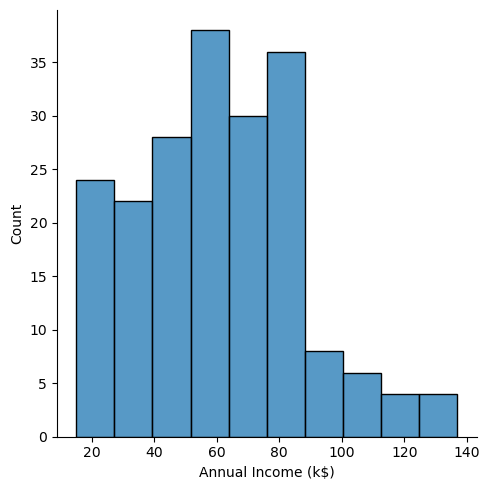

In [14]:
sns.displot(df['Annual Income (k$)'])
plt.show()

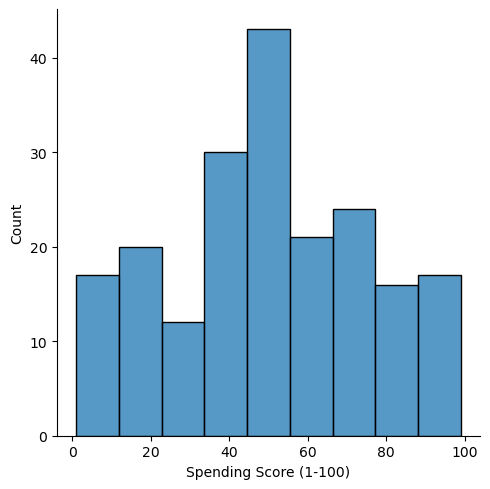

In [15]:
sns.displot(df['Spending Score (1-100)'])
plt.show()

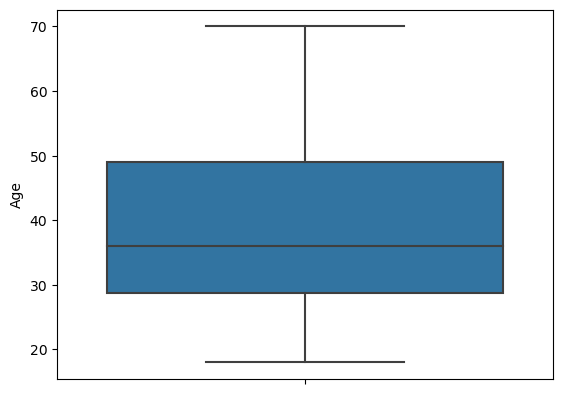

In [19]:
# outlier check
sns.boxplot(y=df.Age)
plt.show()

In [20]:
sns.boxplot(y=df['Annual Income (k$)'])
plt.show()

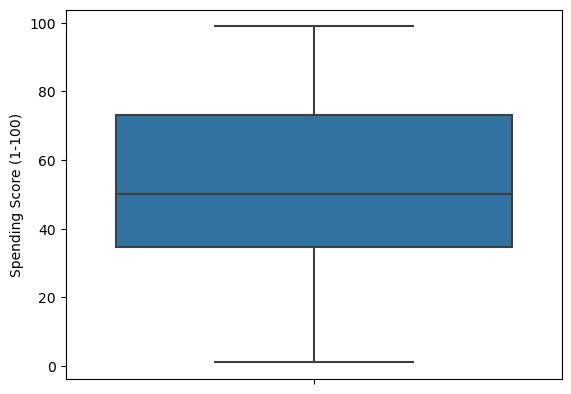

In [21]:
sns.boxplot(y=df['Spending Score (1-100)'])
plt.show()

In [22]:
#bivariant analysis

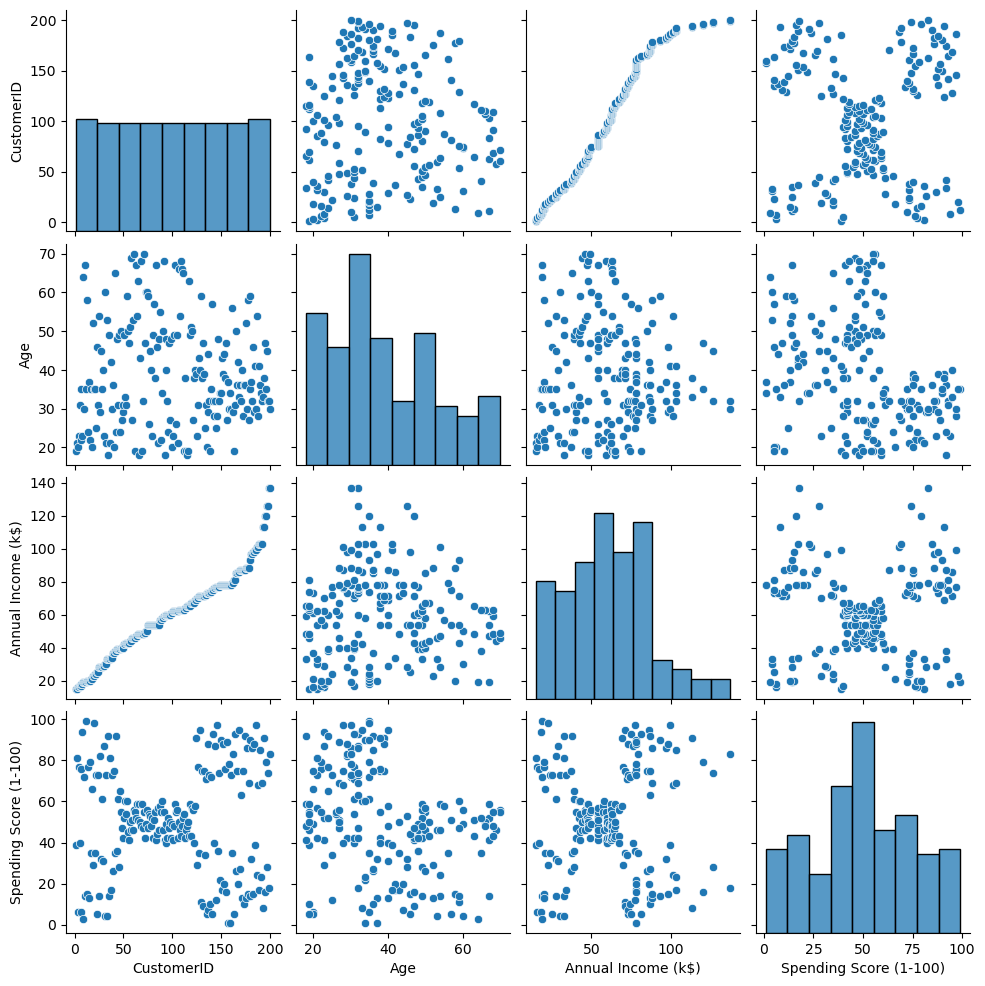

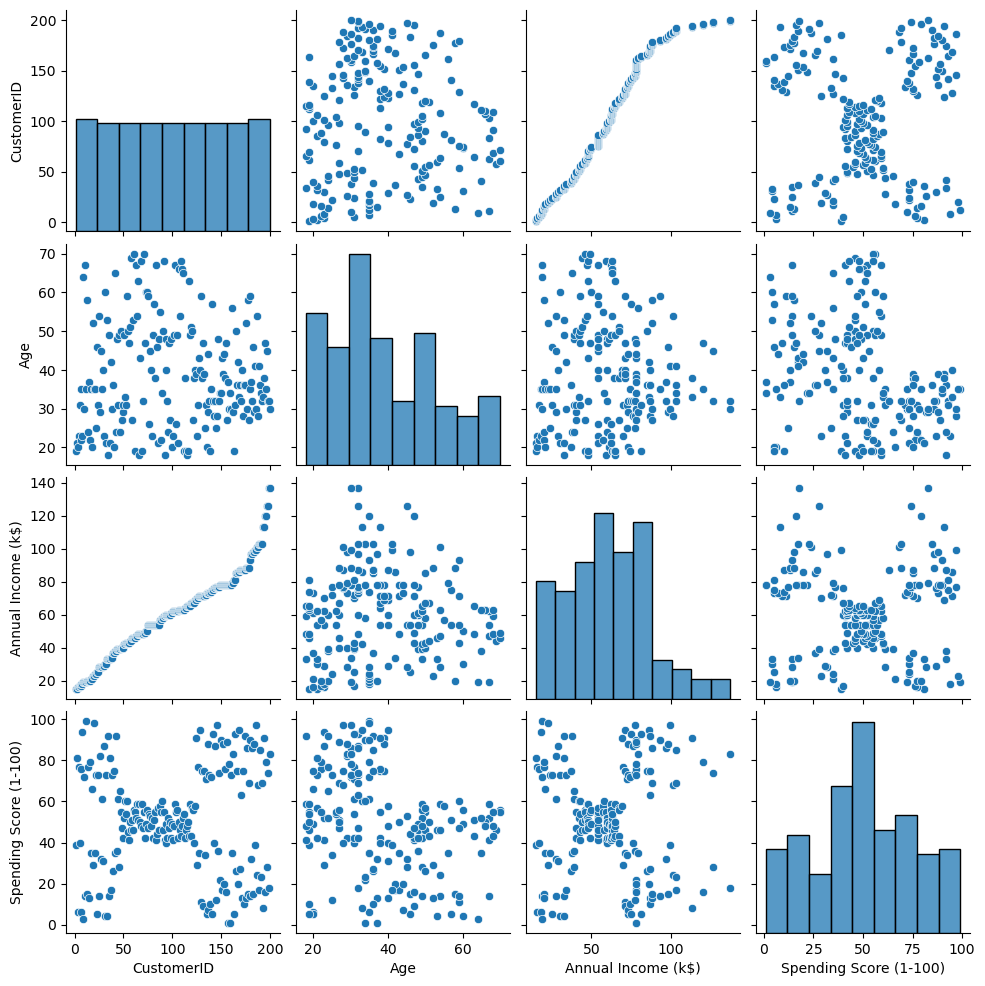

In [29]:
sns.pairplot(data=df)
plt.show()

In [30]:
df.corr()

CustomerID       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.026763            0.977548   
Age                      -0.026763  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.012398            1.000000   
Spending Score (1-100)    0.013835 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000

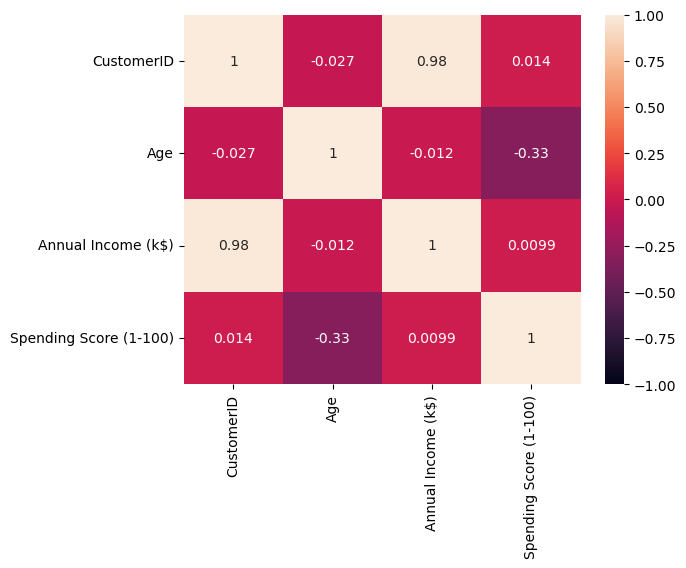

In [34]:
sns.heatmap(df.corr(), vmax=1,vmin=-1, annot=True)
plt.show()

In [35]:
df.select_dtypes(np.number)

CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0             1   19                  15                      39
1             2   21                  15                      81
2             3   20                  16                       6
3             4   23                  16                      77
4             5   31                  17                      40
..          ...  ...                 ...                     ...
195         196   35                 120                      79
196         197   45                 126                      28
197         198   32                 126                      74
198         199   32                 137                      18
199         200   30                 137                      83

[200 rows x 4 columns]

In [37]:
df2 = df[['Annual Income (k$)','Spending Score (1-100)']]

In [41]:
df2.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending'},inplace=True)

C:\Users\anubhaw.sharma\AppData\Local\Temp\ipykernel_22232\104756025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending'},inplace=True)


In [42]:
df2

Income  Spending
0        15        39
1        15        81
2        16         6
3        16        77
4        17        40
..      ...       ...
195     120        79
196     126        28
197     126        74
198     137        18
199     137        83

[200 rows x 2 columns]

In [36]:
from sklearn.cluster import KMeans

In [43]:
cluster =range(2,10)

In [54]:
inertia = list()
for k in range(2,10):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(df2)
    inertia.append(km.inertia_)

In [55]:
X=cluster,
y=inertia

In [56]:
sns.lineplot(x=cluster,y=inertia)
plt.grid(True)
plt.show()

In [76]:
km = KMeans(n_clusters=5,init='k-means++')
y_means = km.fit_predict(df2)

In [77]:
y_means

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [78]:
# plt.figure(figsize=(10, 7))
# plt.scatter(df2[y_means==0, 0], df2[y_means==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.title('Clusters of Mall Customers')
# plt.xlabel('Age')
# plt.ylabel('Annual Income(k$)')
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


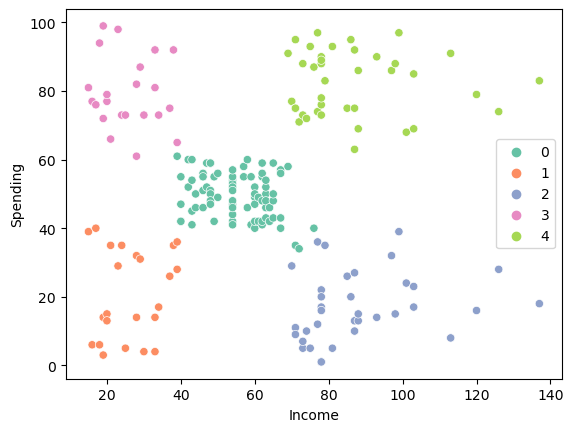

In [79]:
sns.scatterplot(df2.Income, df2.Spending, hue=y_means,  palette="Set2")
plt.show()

In [80]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend = shc.dendrogram()